<a href="https://colab.research.google.com/github/ArcanjoMJA/Iniciante-1/blob/main/Exemplo_MA_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires 

<Axes: xlabel='Date'>

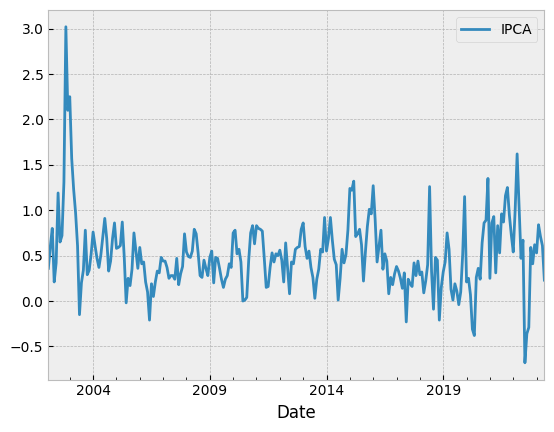

In [1]:
!pip install python-bcb
!pip install --upgrade matplotlib
#https://wilsonfreitas.github.io/python-bcb/index.html
from bcb import sgs

import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.style.use('bmh')

df = sgs.get({'IPCA': 433}, start='2002-02-01')
#df = sgs.get({'IGP-M': 189}, start='2002-02-01')

df.index = df.index.to_period('M')

df.head()


df.plot()

P-value:  1.9128593365476962e-10


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


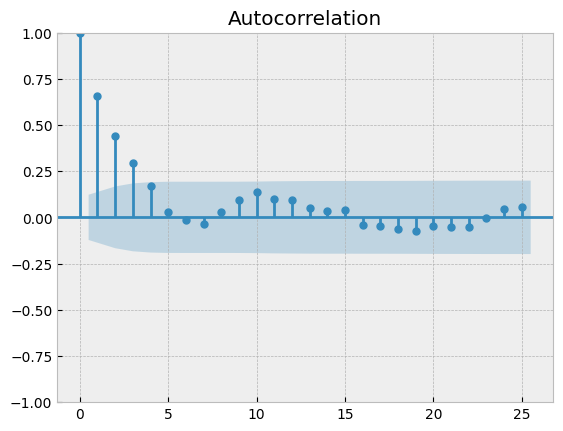

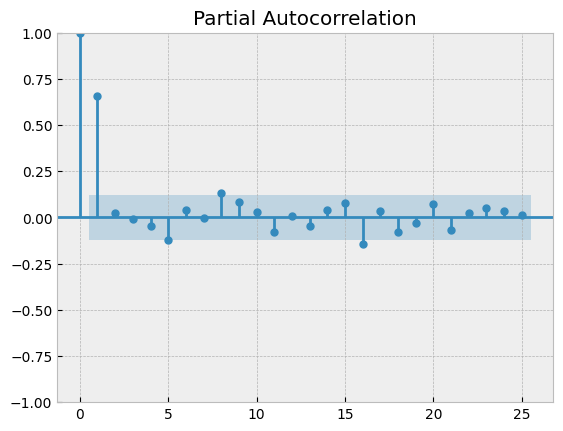

In [4]:
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
df_stationarityTest = adfuller(df, autolag='AIC')
# Teste estatístico
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#Teste Visual
acf= plot_acf(df, lags=25)

#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#

pacf = plot_pacf(df, lags=25)

In [11]:
#
# Create training and test data
from statsmodels.tsa.ar_model import AutoReg
#train_data = df['IPCA'][:len(df)-12]
#test_data = df['IPCA'][len(df)-12:]
train_data = df
test_data = df
import statsmodels.api as sm


#
# Instantiate and fit the AR model with training data
#
ma_model = sm.tsa.arima.ARIMA(train_data, order=(0,1,1)).fit()
#
# Print Summary
#
print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   IPCA   No. Observations:                  256
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -73.617
Date:                Wed, 28 Jun 2023   AIC                            153.234
Time:                        22:57:37   BIC                            163.858
Sample:                    02-28-2002   HQIC                           157.507
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2912      0.054     -5.345      0.000      -0.398      -0.184
ma.L2         -0.2149      0.057     -3.749      0.000      -0.327      -0.103
sigma2         0.1042      0.005     20.251      0.0

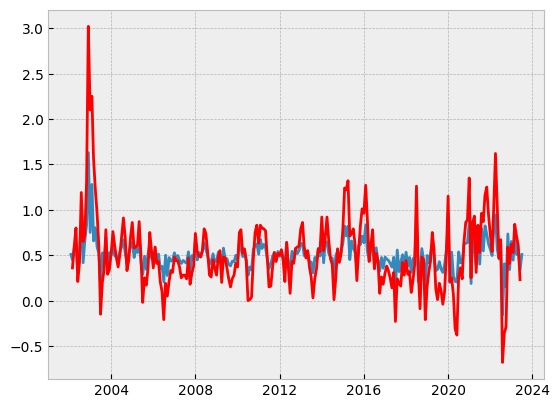

In [ ]:
#
# Make the predictions
#
import pandas as pd
pred = ma_model.predict(start=0, end=(len(df)+1), dynamic=False)
#pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
pred
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred.to_timestamp())

pyplot.plot(test_data, color='red')

In [ ]:
pred

2002-02    0.507832
2002-03    0.447705
2002-04    0.582051
2002-05    0.618390
2002-06    0.298552
             ...   
2023-03    0.710718
2023-04    0.507463
2023-05    0.560567
2023-06    0.337820
2023-07    0.507832
Freq: M, Name: predicted_mean, Length: 258, dtype: float64